### Lekce 7

### Rozhodovací stromy


In [3]:
# Logistická regrese - vypadne výpočet a můžeme vidět koeficienty, algoritmus mi něco spočte
# KNN
# SVM
# Rozhodovací stromy

In [82]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import os
from sklearn.metrics import balanced_accuracy_score
import numpy

In [5]:
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

In [6]:
data = pandas.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
# Definování sloupců s vlastnostmi (features) -na kterých budu rozhodovat 
feature_cols = ["gill-size"]  # budu rozhodovat jen podle jednoho sloupce


# gill-size (velikost lupenů), broad (široký)=b, narrow (úzký)=n
#gill-spacing (rozestup lupenů), close (blízký)=c, crowded (hustý)=w, distant (vzdálený)=d

# Výběr sloupců s vlastnostmi z dat
X = data[feature_cols]
# Výběr cílové proměnné (target variable) z dat
y = data["class"]

# Vytvoření instance OneHotEncoder 
# z 1 sloupce mi to vyrobí 2 sloupce 
encoder = OneHotEncoder()  # get_dummies metoda v pandas 
# Přizpůsení a transformace X pomocí OneHotEncoder
X = encoder.fit_transform(X) 
# Převod výsledku na pole (array)
X = X.toarray()
# Výstup transformovaného X
X

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [11]:
# Získání názvů nových vytvořených vlastností po OneHotEncoder transformaci
encoder.get_feature_names_out()

array(['gill-size_b', 'gill-size_n'], dtype=object)

In [ ]:
# Rozhodovací strom by si poradil i s kosatcemi ( 4.5, 4.6) a nejen s kategoriemi

Dále vytvoříme DecisionTreeClassifier, což je klasifikátor využívající algoritmus rozhodovacího stromu. Necháme nastavené výchozí parametry.

In [15]:
# Rozdělení dat na trénovací a testovací
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Vytvoření instance DecisionTreeClassifier s náhodným stavem (random_state) nastaveným na 42
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train) # Trénování modelu
y_pred = clf.predict(X_test) # Predikce (predict) hodnot cílové proměnné (y) pomocí testovacích dat X_test

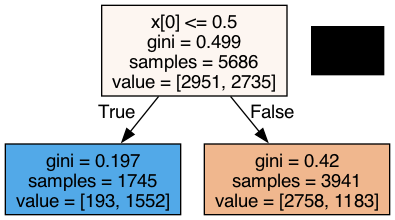

In [16]:
# Vytvoření objektu StringIO, který je jakousi "virtuální" souborovou strukturou v paměti. 
# Tento objekt bude použit pro ukládání struktury rozhodovacího stromu.
dot_data = StringIO()#uloží se mi tento virtuální soubor do paměti 
# Funkce export_graphviz z knihovny sklearn se používá pro konverzi rozhodovacího stromu 
# do DOT formátu, což je grafický jazyk používaný pro popis grafů a stromů. Parametr out_file určuje,
# kam se výsledek uloží - v tomto případě do naší StringIO instance dot_data. Parametr filled=True znamená, 
# že uzly stromu budou vyplněny barvou, což může pomoci vizualizovat hodnoty v uzlech.
export_graphviz(clf, out_file=dot_data, filled=True) # filled=True strom bude barevny
# Tento řádek kódu používá knihovnu pydotplus k převedení DOT dat do formátu, který lze využít pro vytvoření obrázku. 
# Metoda getvalue() naší instance StringIO (dot_data) se používá pro získání celého obsahu jako jednoho řetězce.
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) # převede se do toho formátu, který dokáže vykreslit
# Tento poslední řádek vytváří obrázek stromu ve formátu PNG. Funkce Image pochází z knihovny IPython 
# a slouží pro zobrazení obrázku přímo v notebooku Jupyter. Metoda create_png() na objektu graph generuje samotný obrázek.
Image(graph.create_png())

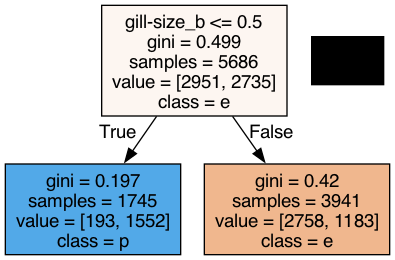

In [22]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data, # Soubor, do kterého se uloží výstup ve formátu DOT
                filled=True, # Vyplnění uzlů barvami pro lepší vizualizaci
                feature_names=encoder.get_feature_names_out(), # Názvy vlastností po OneHotEncoder transformaci
                class_names=clf.classes_) # Názvy tříd, které byly naučeny klasifikátorem
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

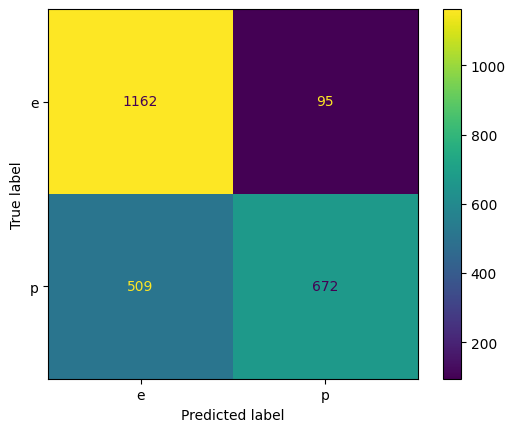

In [26]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [29]:
feature_cols = ["gill-size", "gill-color"]
# gill-size (velikost lupenů), broad (široký)=b, narrow (úzký)=n
#gill-spacing (rozestup lupenů), close (blízký)=c, crowded (hustý)=w, distant (vzdálený)=d

# Výběr sloupců s vlastnostmi z dat
X = data[feature_cols]
# Výběr cílové proměnné (target variable) z dat
y = data["class"]

# Vytvoření instance OneHotEncoder 
# z 1 sloupce mi to vyrobí 2 sloupce 
encoder = OneHotEncoder()  # get_dummies metoda v pandas 
# Přizpůsení a transformace X pomocí OneHotEncoder
X = encoder.fit_transform(X) 
# Převod výsledku na pole (array)
X = X.toarray()
# Výstup transformovaného X
X


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [30]:
# Získání názvů nových vytvořených vlastností po OneHotEncoder transformaci
encoder.get_feature_names_out()

array(['gill-size_b', 'gill-size_n', 'gill-color_b', 'gill-color_e',
       'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n',
       'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u',
       'gill-color_w', 'gill-color_y'], dtype=object)

In [31]:
# Rozdělení dat na trénovací a testovací
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Vytvoření instance DecisionTreeClassifier s náhodným stavem (random_state) nastaveným na 42
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train) # Trénování modelu
y_pred = clf.predict(X_test) # Predikce (predict) hodnot cílové proměnné (y) pomocí testovacích dat X_test


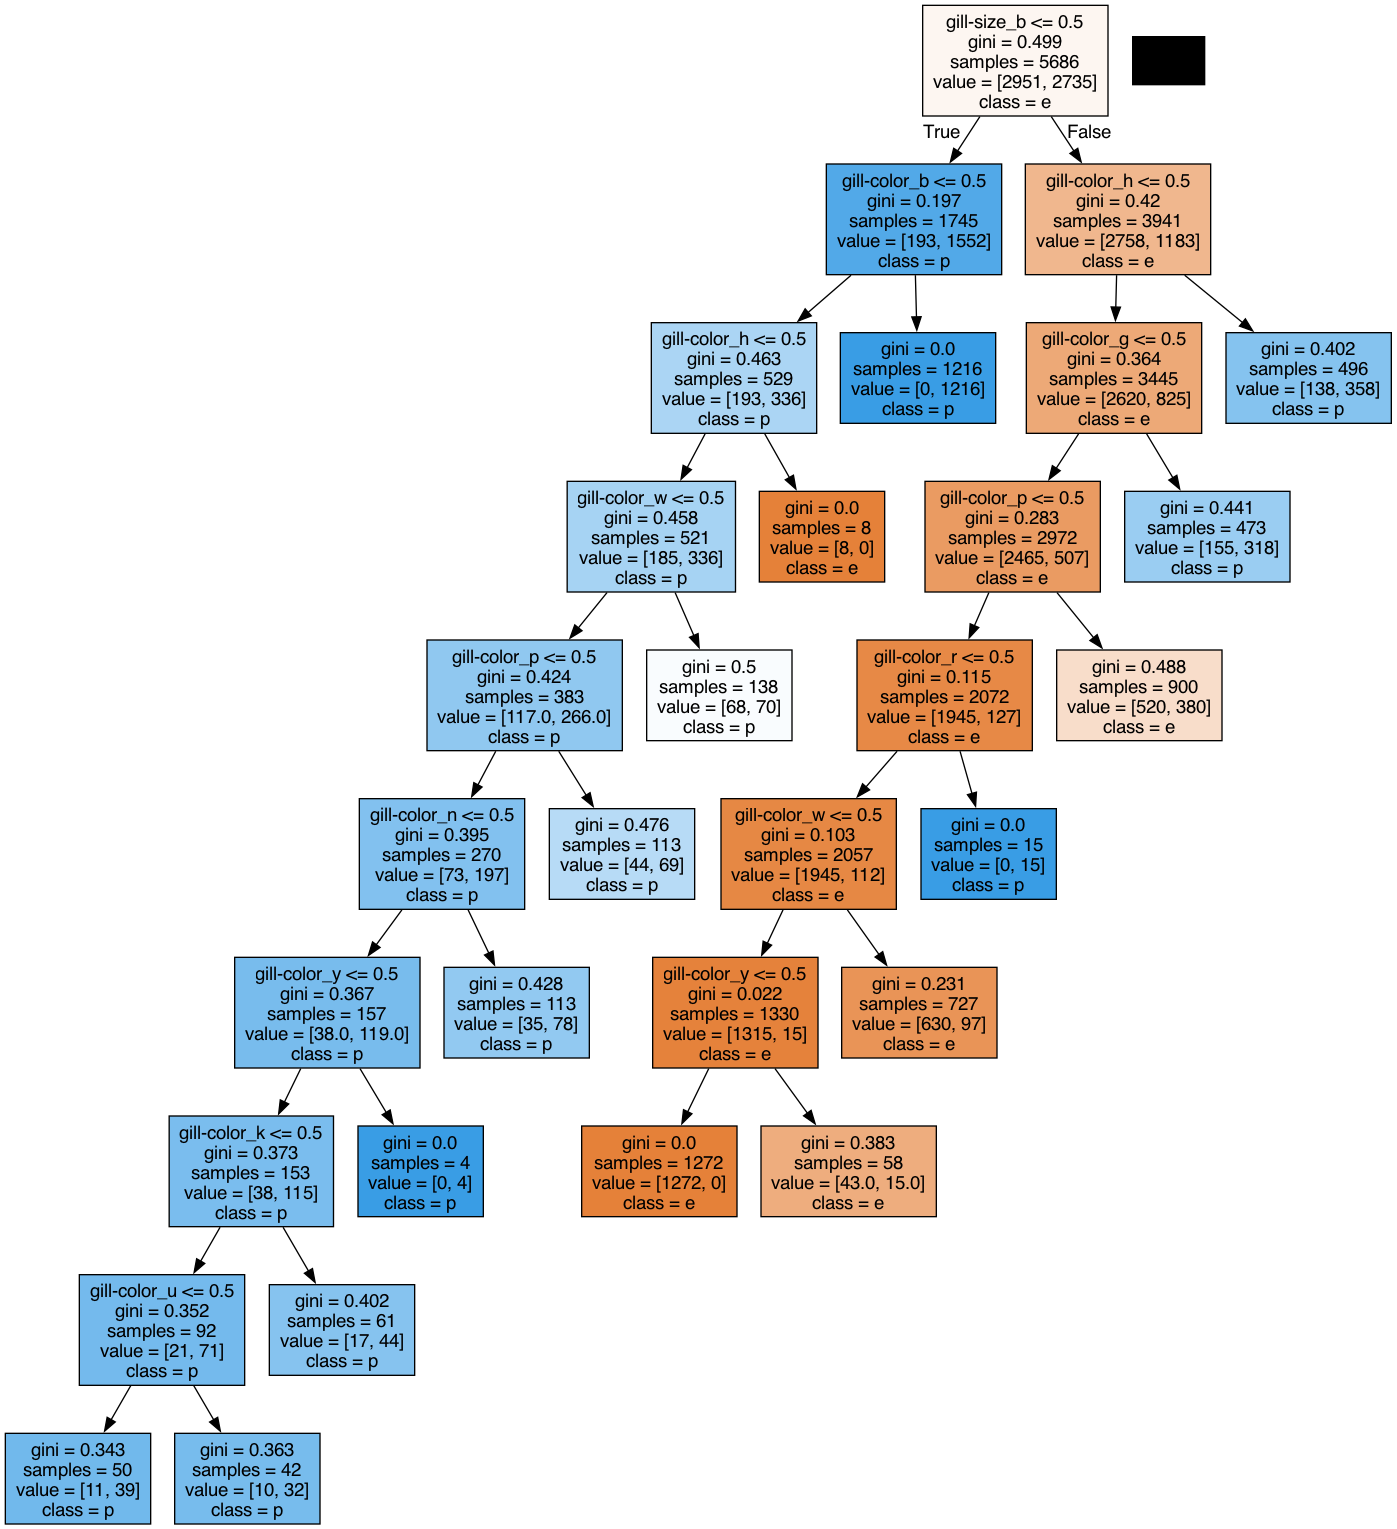

In [32]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data, # Soubor, do kterého se uloží výstup ve formátu DOT
                filled=True, # Vyplnění uzlů barvami pro lepší vizualizaci
                feature_names=encoder.get_feature_names_out(), # Názvy vlastností po OneHotEncoder transformaci
                class_names=clf.classes_) # Názvy tříd, které byly naučeny klasifikátorem
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

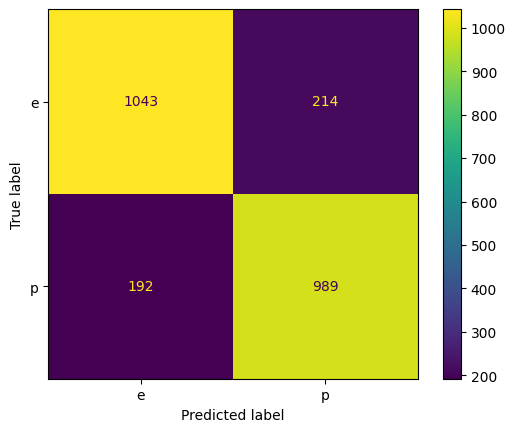

In [33]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

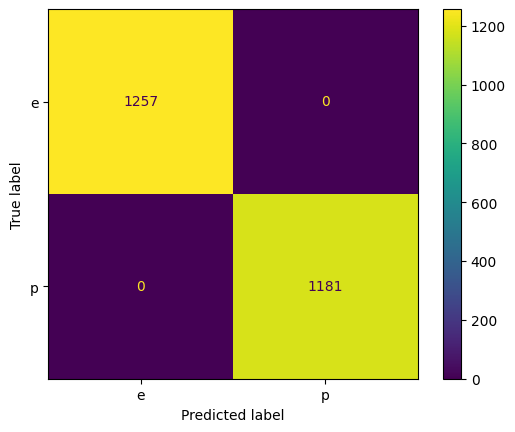

In [34]:
data = pandas.read_csv("mushrooms.csv")

# Výběr sloupců s vlastnostmi z dat
X = data.drop(columns="class")   # vyberu všechny kromě class 
# Výběr cílové proměnné (target variable) z dat
y = data["class"]
# Vytvoření instance OneHotEncoder
encoder = OneHotEncoder()
# Přizpůsobení a transformace X pomocí OneHotEncoder
X = encoder.fit_transform(X)
# Převod výsledku na pole (array)
X = X.toarray()
# Výstup transformovaného X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [35]:
accuracy_score(y_test, y_pred)

1.0

In [37]:
precision_score(y_test, y_pred, pos_label="p") #musím mu říct, co je pozitivní hodnota
#pozitivní něco ve smyslu, že bych měl udělat akci a houbu vyhodit 

1.0

In [ ]:
# grid search

In [40]:
data = pandas.read_csv("mushrooms.csv")

# Výběr sloupců s vlastnostmi z dat
X = data.drop(columns="class")   # vyberu všechny kromě class 
# Výběr cílové proměnné (target variable) z dat
y = data["class"]
# Vytvoření instance OneHotEncoder
encoder = OneHotEncoder()
# Přizpůsobení a transformace X pomocí OneHotEncoder
X = encoder.fit_transform(X)
# Převod výsledku na pole (array)
X = X.toarray()
# Výstup transformovaného X

model = DecisionTreeClassifier()
params = {"max_depth":[3,4,5,6,7,8,9,10], "min_samples_split":[10,20,30,40]}
#jede 3-10,3-20,3-30,3-40, pak 4-10,4-20,4-30,4-40

clf = GridSearchCV(model,params,scoring="accuracy") #klasifikátor, který zkouší různé parametry  
clf.fit(X,y) #trénovací a testovací data si zajistí grid sám

print(clf.best_params_) # ideální hloubka je 8
print(clf.best_score_) # je tam nejlepší accuracy -tady ten výsledek je realističtější
# ty data se míchají opakovaně, takže je to robusnější

{'max_depth': 7, 'min_samples_split': 10}
0.9963058734369079


In [41]:
# Cvičení
# Rezervace 

In [117]:
data = pandas.read_csv("hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [118]:
data["is_canceled"].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

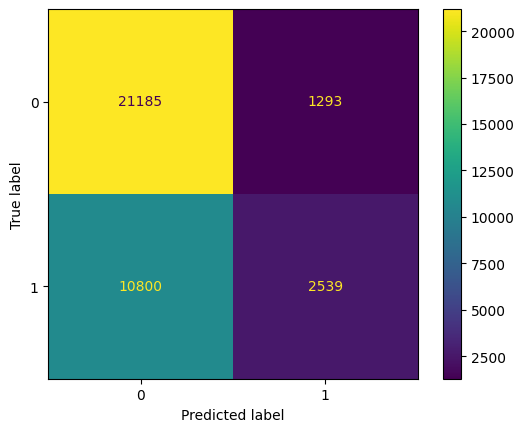

In [173]:
data = pandas.read_csv("hotel_bookings.csv")
X = data[["lead_time"]]
y = data["is_canceled"]
#encoder = OneHotEncoder()  # get_dummies metoda v pandas 
# Přizpůsení a transformace X pomocí OneHotEncoder
#X = encoder.fit_transform(X) 
# Převod výsledku na pole (array)
#X = X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train) # trénujeme
y_pred = clf.predict(X_test) # predikujeme

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

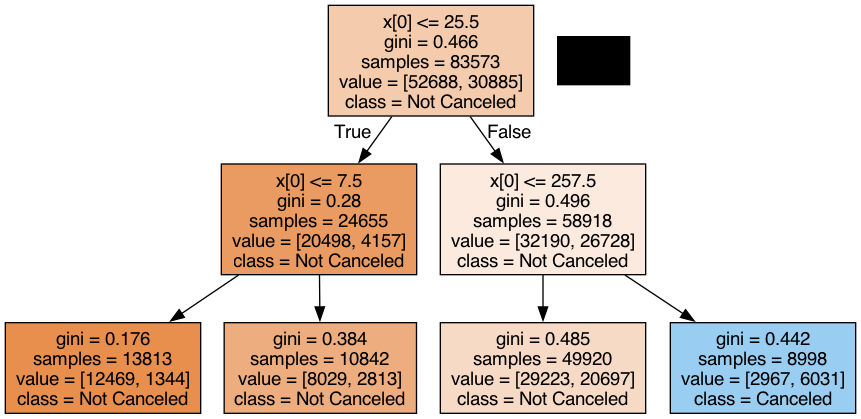

In [174]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, class_names=["Not Canceled","Canceled"])
                # Soubor, do kterého se uloží výstup ve formátu DOT
                 # Vyplnění uzlů barvami pro lepší vizualizaci
                #názvy tříd
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

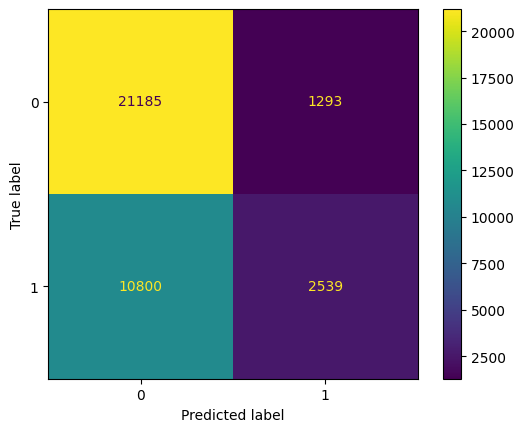

In [175]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [176]:
accuracy_score(y_test, y_pred)

0.6623670324147751

In [177]:
balanced_accuracy_score(y_test, y_pred)

0.5664105962324318

In [178]:
categorical_columns = ["country", "market_segment", "distribution_channel", "arrival_date_month", "meal"]
numeric_columns = ["lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled"]

In [179]:
# Převod na pole - numpy
others = data[numeric_columns].to_numpy()
ohe = OneHotEncoder()  # categoriální převedeme na čísla 
# Použití OneHotEncoder - "vyrobí" číselné sloupečky z textových sloupečků
encoded_columns = ohe.fit_transform(data[categorical_columns])
# Převedeme data na pole
encoded_columns = encoded_columns.toarray()
# Spojíme obě pole dohromady - chceme mít zase všechna data pohromadě
X = numpy.concatenate([encoded_columns, others], axis=1)

In [180]:
model = DecisionTreeClassifier()
params = {"min_samples_split":[10,20,30,40]} #kolik je minimálně ve skupině vzorků

In [181]:
clf = GridSearchCV(model,params,scoring="accuracy")
clf.fit(X,y)

print(clf.best_params_)
print(clf.best_score_)

{'min_samples_split': 40}
0.6446519809029232


In [185]:
best_clf = clf.best_estimator_

In [187]:
#y_pred_test = best_clf.predict(X_test)
#print(accuracy_score(y_test,y_pred_test))
#print(balanced_accuracy_score(y_test,y_pred_test))

#ConfusionMatrixDisplay.from_estimator(best_clf, X_test, y_test)

In [130]:
data = pandas.read_csv("wine.csv")#quiz 

In [131]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [161]:
X = data[["alcohol","sulphates","total sulfur dioxide"]]
# Výběr cílové proměnné (target variable) z dat
y = data["quality"]

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)# Vytvoření instance DecisionTreeClassifier s náhodným stavem (random_state) nastaveným na 42


In [163]:
clf = DecisionTreeClassifier(random_state=42,max_depth=3)
# Trénování modelu
clf = clf.fit(X_train, y_train)
# Predikce (predict) hodnot cílové proměnné (y) pomocí testovacích dat X_test
y_pred = clf.predict(X_test)

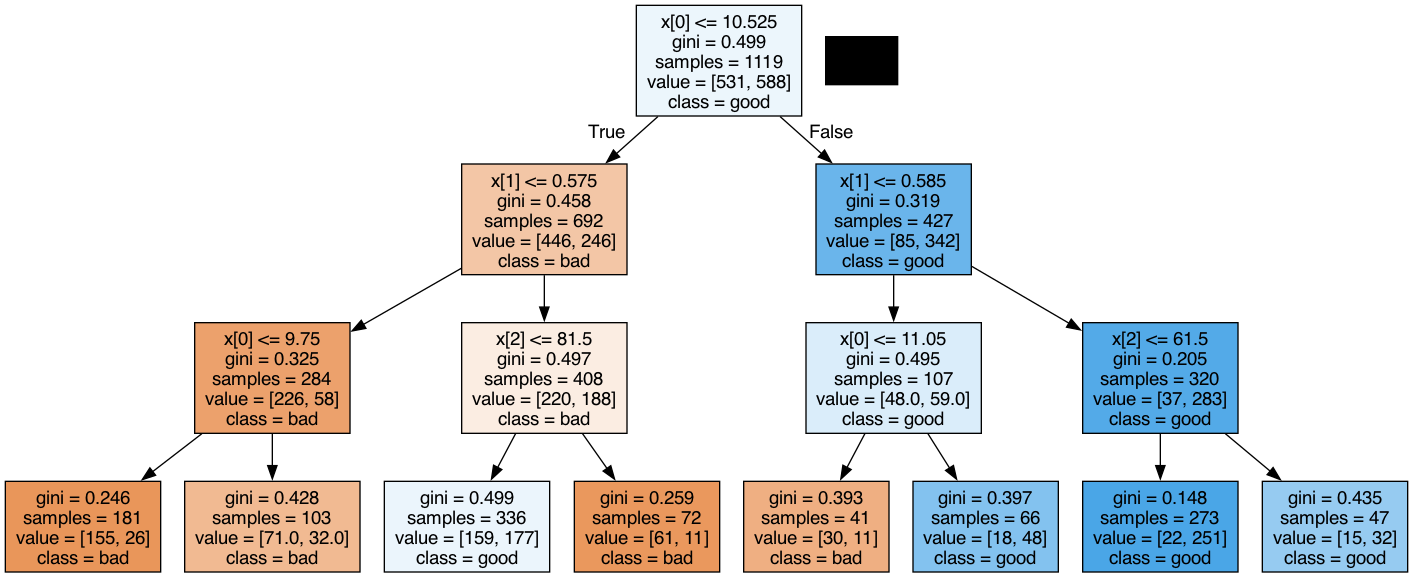

In [167]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data, # Soubor, do kterého se uloží výstup ve formátu DOT
                filled=True, # Vyplnění uzlů barvami pro lepší vizualizaci
                class_names=clf.classes_) # Názvy tříd, které byly naučeny klasifikátorem
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [168]:
clf = DecisionTreeClassifier(min_samples_split=300)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

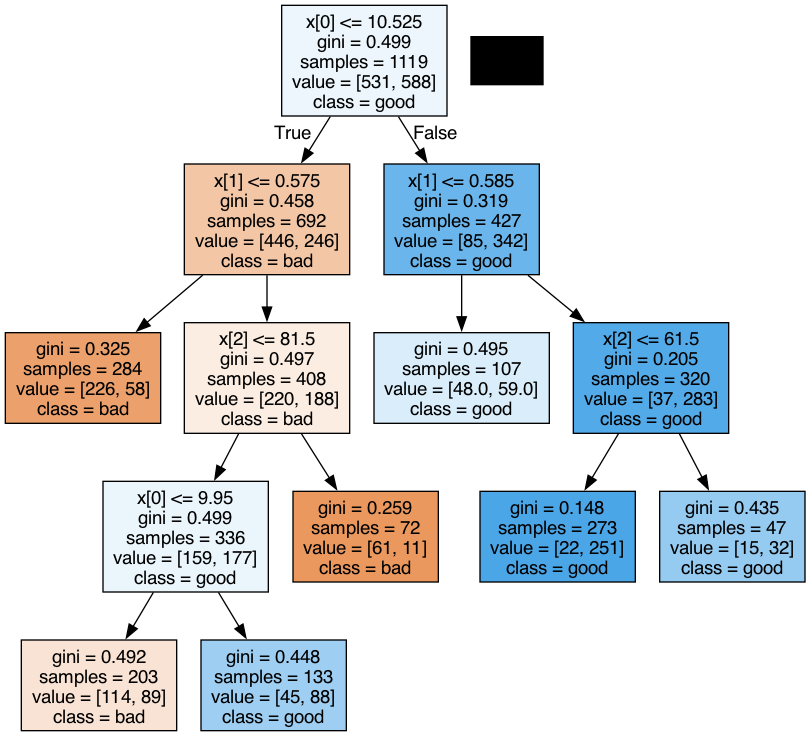

In [169]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data, # Soubor, do kterého se uloží výstup ve formátu DOT
                filled=True, # Vyplnění uzlů barvami pro lepší vizualizaci
                class_names=clf.classes_) # Názvy tříd, které byly naučeny klasifikátorem
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

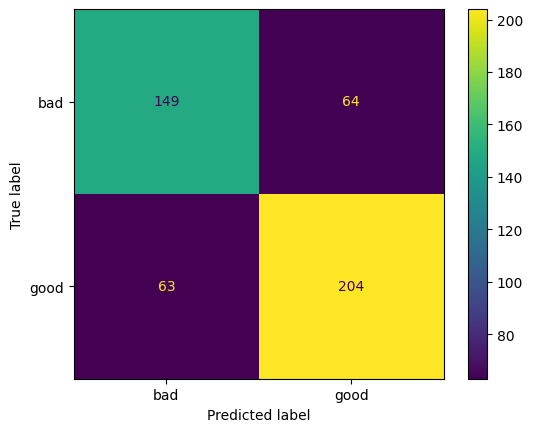

In [172]:
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)